<a href="https://colab.research.google.com/github/Manojkumar310897/Flight-Fare-Prediction/blob/main/Final_Chennai_House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ☛ Problem Statement : 
<pre>Real estate transactions are quite opaque sometimes and it may be  difficult for a newbie to know the fair price of any given home. 
Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it.
Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build 
homes that fetch them more money.
It is expected to build a sale price prediction model that will aid the customers to find a fair price for their homes 
and also help the sellers understand what factors are fetching more money for the houses.</pre>



# ≣ Variables in the Dataset : 
       ✤ PRT_ID : Project ID (object)
       ✤ AREA : Area where the house is located (object)
       ✤ INT_SQFT : Total area of the house in square-feet (int)
       ✤ DATE_SALE : Date on which the house got sold (object)
       ✤ DIST_MAINROAD : Distance from the house to the mainroad -in meters(int)
       ✤ N_BEDROOM : Number of Bedrooms (float)
       ✤ N_BATHROOM : Number of Bathrooms (float)
       ✤ N_ROOM : Number of Rooms (int)
       ✤ SALE_COND : Sale Conditions (object)
       ✤ PARK_FACIL : Parking Facility (object)
       ✤ DATE_BUILD : Date on which the house was built (object)
       ✤ BUILD_TYPE : Type of the house (object)
       ✤ UTILITY_AVAIL : Utilities available for the owner of the house (object)
       ✤ STREET : Street where the house is located (object)
       ✤ MZZONE : Chennai Regions are divided into multiple zones, MZZONE is nothing but the zone where the house belongs to (object)
       ✤ QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL : Masked Data (float)
       ✤ REG_FEE : Registration Fees (int)
       ✤ COMMIS : Commission (int)
       ✤ SALE_PRICE : Price at which the house got sold (int)

## Importing necessary dependencies

In [ ]:
# for data reading and data manipulation
import numpy as np
import pandas as pd
import statistics as st

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for model creation and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# reading data from a .csv file to a Pandas DataFrame
df = pd.read_csv('train-chennai-sale.csv')
pd.set_option('display.max_columns',None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
df.shape

(7109, 22)

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

<pre>As the names of all the columns in the DataFrame are in CAPS, I would like to rename all the columns to it's lower_case form,
So later it would be efficient for me to work with the dataframe. For this I will create a function 'rename_cols'.</pre>

In [ ]:
def rename_cols(dataframe):
  cols = [var.lower() for var in dataframe.columns]
  dataframe.columns = cols
  return dataframe

In [ ]:
df = rename_cols(df)

In [ ]:
df.head()

,prt_id,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,reg_fee,commis,sales_price
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
print(f'➤ The DataFrame(df) contains {df.shape[0]} rows and {df.shape[1]} columns.')

➤ The DataFrame(df) contains 7109 rows and 22 columns.


<pre>Here I can clearly sense that there are 3 as of such columns which in no way can contribute for the price prediction of house : 
1.) prt_id
2.) reg_fee
3.) commis

Hence it is better to drop these 3 columns before further analysis.</pre>

In [ ]:
df.drop(columns = ['prt_id','reg_fee','commis'],inplace=True)

In [ ]:
print(f'➤ Now the shape of the Dataframe is {df.shape[0]} rows and {df.shape[1]} columns.')

➤ Now the shape of the Dataframe is 7109 rows and 19 columns.


In [ ]:
df.head(2)

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770


## Checking and Handling Missing Values 
    Checking for missing values

In [ ]:
# looking for the amount of null data in the pandas dataframe
df.isnull().sum()

area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
sales_price       0
dtype: int64

In [ ]:
# looking for the percentage of null data in the dataframe
pd.DataFrame(df.isna().mean()*100).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,0.0,0.0,0.0,0.0,0.014067,0.070333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6752,0.0


    Handling missing values.

<pre>The percentage of missing values for columns with missing values is way less then 5%,
Therefore we can deal with them rather than losing our data.</pre>

<pre>➺ As there is only 1 missing value in <i>n_bedroom</i>, it can be replaced with Mode.
➺ There are 5 missing values in <i>n_bathroom</i>, it  can be replaced with the median of that particular column.
➺ The columns <i>qs_overall</i> is a special case as the data in that column is masked and the data is in floating point number,
it is good to replace it with mean.</pre>


In [ ]:
# filling the missing values using statistical techniques
df = df.fillna({'n_bedroom': st.mode(df['n_bedroom']),
                'n_bathroom': st.mode(df['n_bathroom']),
                'qs_overall': df['qs_overall'].mean()})

In [ ]:
# cross  checking  for  null  values
pd.DataFrame(df.isnull().sum()).T

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Type Correction 
<pre>It is observed that the data-type of certain columns are not exactly the right data-type suitable for those corresponding columns: 
⃰ The data type of columns <i>n_bedroom</i> and <i>n_bathroom</i> are unnecessarily given as 'float' but it is better to change them into 'int' for better computation.
⃰ The data type of columns <i>date_sale</i> and <i>date_build</i> are as 'strings' but should be of 'datetime'.



In [ ]:
df.dtypes

area              object
int_sqft           int64
date_sale         object
dist_mainroad      int64
n_bedroom        float64
n_bathroom       float64
n_room             int64
sale_cond         object
park_facil        object
date_build        object
buildtype         object
utility_avail     object
street            object
mzzone            object
qs_rooms         float64
qs_bathroom      float64
qs_bedroom       float64
qs_overall       float64
sales_price        int64
dtype: object

In [ ]:
# correcting data type of columns n_bedroom and n_bathroom
df['n_bedroom'] = df['n_bedroom'].astype(int)
df['n_bathroom'] = df['n_bathroom'].astype(int)

#correcting data type of columns date_sale and date_build
df['date_sale'] = pd.to_datetime(df['date_sale'])
df['date_build'] = pd.to_datetime(df['date_build'])

Streaming output truncated to the last 5000 lines.
<ipython-input-17-2870807a2e68>:7: UserWarning: Parsing '31-08-1997' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date_build'] = pd.to_datetime(df['date_build'])
<ipython-input-17-2870807a2e68>:7: UserWarning: Parsing '23-09-1987' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date_build'] = pd.to_datetime(df['date_build'])
<ipython-input-17-2870807a2e68>:7: UserWarning: Parsing '27-03-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date_build'] = pd.to_datetime(df['date_build'])
<ipython-input-17-2870807a2e68>:7: UserWarning: Parsing '20-01-1999' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['date_build'] = pd.to_datetime(df['date_build'])
<ipython-input-17-2870807a2e68>:7: UserWarning: Parsing '19-0

In [ ]:
from datetime import date, datetime, timedelta

todayData = datetime(2023, 2, 18,4,48,0)
todayData.weekday()

5

In [ ]:
# cross-checking the data-types of all the columns in the dataframe
df.dtypes

area                     object
int_sqft                  int64
date_sale        datetime64[ns]
dist_mainroad             int64
n_bedroom                 int64
n_bathroom                int64
n_room                    int64
sale_cond                object
park_facil               object
date_build       datetime64[ns]
buildtype                object
utility_avail            object
street                   object
mzzone                   object
qs_rooms                float64
qs_bathroom             float64
qs_bedroom              float64
qs_overall              float64
sales_price               int64
dtype: object

## Creation of a new column "house_age":
There are 2 columns named 'date_sale' and 'date_build' which represents date on which the house got sold and the date on which the house was built respectively. Both of this columns do not make any sense as of such but there is one thing that can be yielded using both of this columns and that is age of the house, how old the house is can be a good decisive factor for determining the "sales_price". This new column's value will be in *no_of_years*.

After this we can drop columns *date_sale* and *date_build*.

<pre> house_age = date_sale - date_build</pre>

In [ ]:
df['house_age'] = df['date_sale'].dt.year - df['date_build'].dt.year

In [ ]:
df['house_age'] 

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: house_age, Length: 7109, dtype: int64

In [ ]:
df.drop(columns = ['date_sale','date_build'],inplace=True)

In [ ]:
df.head()

,area,int_sqft,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price,house_age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [ ]:
df.shape

(7109, 18)

In [ ]:
# viewing how many columns in the dataframe fall in the object and the numeric data types
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64,float64
0,7,7,4


In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['int_sqft',
 'dist_mainroad',
 'n_bedroom',
 'n_bathroom',
 'n_room',
 'sales_price',
 'house_age']

    From the above results of the code cell it seems that there is nothing to worry about the int64 cols no changes needed.

In [ ]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall']

    From the above results of columns with floating point number there seems nothing wrong, No changes needed.

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['area',
 'sale_cond',
 'park_facil',
 'buildtype',
 'utility_avail',
 'street',
 'mzzone']

<pre>As the number of object data type columns is more it is important to know how each object data column is divided into categories. 
Let's explore all the categorical columns and know into how many categories they are divided into.</pre>

In [ ]:
for i in object_data_cols:
  print(f'Column "{i}" is divided into "{len(df[i].value_counts())}" categories.')

Column "area" is divided into "17" categories.
Column "sale_cond" is divided into "9" categories.
Column "park_facil" is divided into "3" categories.
Column "buildtype" is divided into "5" categories.
Column "utility_avail" is divided into "5" categories.
Column "street" is divided into "5" categories.
Column "mzzone" is divided into "6" categories.


The categorical columns are having too many categories, seems like it is needed to analyze all of them one by one.

In [ ]:
# for column "area"
df['area'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

<pre>For the column "area" there are many spelling mistakes which is the resulting factor for soo many categories.
Let's fix 'em </pre>

In [ ]:
df['area'] = df['area'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','TNagar':'T Nagar','Karapakam':'Karapakkam','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar','Velchery':'Velachery','Adyr':'Adyar','KKNagar':'KK Nagar'})

In [ ]:
df['area'].value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: area, dtype: int64

In [ ]:
# for column "sale_cond"
df['sale_cond'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: sale_cond, dtype: int64

<pre>Even here we have the same spelling mistakes.
Let's fix 'em up!</pre>

In [ ]:
df['sale_cond'] = df['sale_cond'].replace({'Adj Land':'AdjLand','Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial'})

In [ ]:
df['sale_cond'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

In [ ]:
# for column "park_facil"
df['park_facil'].value_counts()

Yes    3587
No     3520
Noo       2
Name: park_facil, dtype: int64

<pre> Same Spelling Mistakes!!!!!</pre>

In [ ]:
df['park_facil'] = df['park_facil'].replace({'Noo':'No'})

In [ ]:
df['park_facil'].value_counts()

Yes    3587
No     3522
Name: park_facil, dtype: int64

In [ ]:
# for column "buildtype"
df['buildtype'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: buildtype, dtype: int64

<pre>AGHHH!!! Same spelling mistakes!

In [ ]:
df['buildtype'] = df['buildtype'].replace({'Comercial':'Commercial','Other':'Others'})

In [ ]:
df['buildtype'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

In [ ]:
# for column "utility_avail"
df['utility_avail'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: utility_avail, dtype: int64

<pre> Again its the same thing here,SPELLING MISTAKES!!! </pre>

In [ ]:
df['utility_avail'] = df['utility_avail'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'])

In [ ]:
df['utility_avail'].value_counts()

No Sewer    3700
AllPub      1887
ELO         1522
Name: utility_avail, dtype: int64

In [ ]:
# for column "street"
df['street'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: street, dtype: int64

<pre> Spelling Mistake Again! </pre>

In [ ]:
df['street'] = df['street'].replace({'Pavd':'Paved','NoAccess':'No Access'})

In [ ]:
df['street'].value_counts().T

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

In [ ]:
# for column "mzzone"
df['mzzone'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

<pre> Here in column "mzzone" there is no such spelling error, everything here is okay!</pre>

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(7109, 18)

## Data Visualization.

In [ ]:
df['area'].value_counts().index[::-1]

Index(['T Nagar', 'Adyar', 'Anna Nagar', 'Velachery', 'KK Nagar', 'Karapakkam',
       'Chrompet'],
      dtype='object')

In [ ]:
!pip install seaborn==0.11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 KB 4.6 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seab

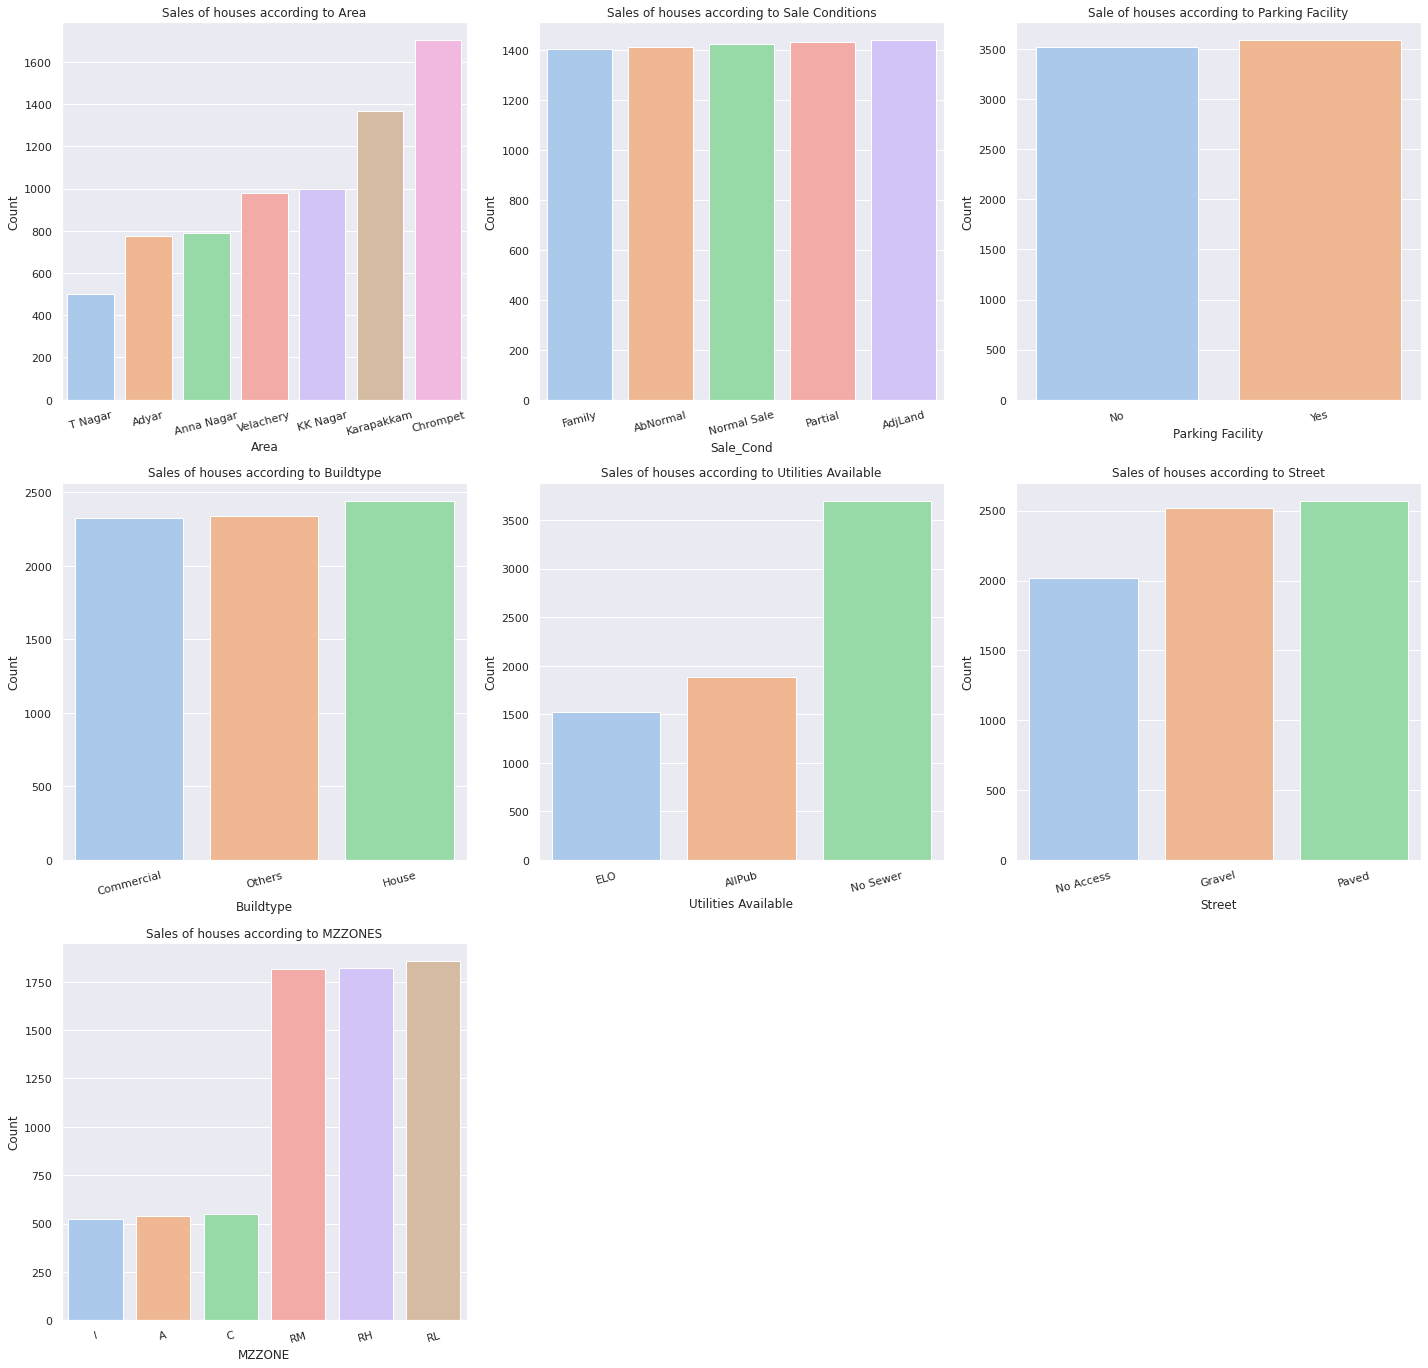

In [ ]:
#plotting count plots for all the categorical columns
sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['area'],order=df['area'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

plt.subplot(432)
sns.countplot(df['sale_cond'],order=df['sale_cond'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond')
plt.ylabel('Count')
plt.title('Sales of houses according to Sale Conditions')

plt.subplot(433)
sns.countplot(df['park_facil'],order=df['park_facil'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Count')
plt.title('Sale of houses according to Parking Facility')

plt.subplot(434)
sns.countplot(df['buildtype'],order=df['buildtype'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to Buildtype')

plt.subplot(435)
sns.countplot(df['utility_avail'],order=df['utility_avail'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of houses according to Utilities Available')

plt.subplot(436)
sns.countplot(df['street'],order=df['street'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Count')
plt.title('Sales of houses according to Street')

plt.subplot(437)
sns.countplot(df['mzzone'],order=df['mzzone'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of houses according to MZZONES')

plt.tight_layout()

<pre>Interpretations :
 1.) According to the column "area" the highest number of houses sold were in the area "Chrompet".
 2.) According to the column "sale_cond", no such category has a strong influence on sales of house.
 3.) According to the column "park_facil", houses with parking facilities are slightly sold more.
 4.) According to the column "buildtype", houses used for living are sold more then using it as commercial or other spaces.
 5.) According to the column "utility_avail", houses with No Sewer are most sold.
 6.) According to the column "street", paved street and gravel street are more sold compared to houses with no access to street.
 7.) According to the column "mzzone", Zones such as RL, RH, RM are the zones where the most number of houses got sold.</pre>

    Plotting barplots for Categorical Columns vs Mean Sales Price.

In [ ]:
#orders for all the barplots in ascending order
area_order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sale_cond_order = df.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order = df.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
buildtype_order = df.groupby('buildtype')['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order = df.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail']
street_order = df.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')['street']
mzzone_order = df.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone']

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

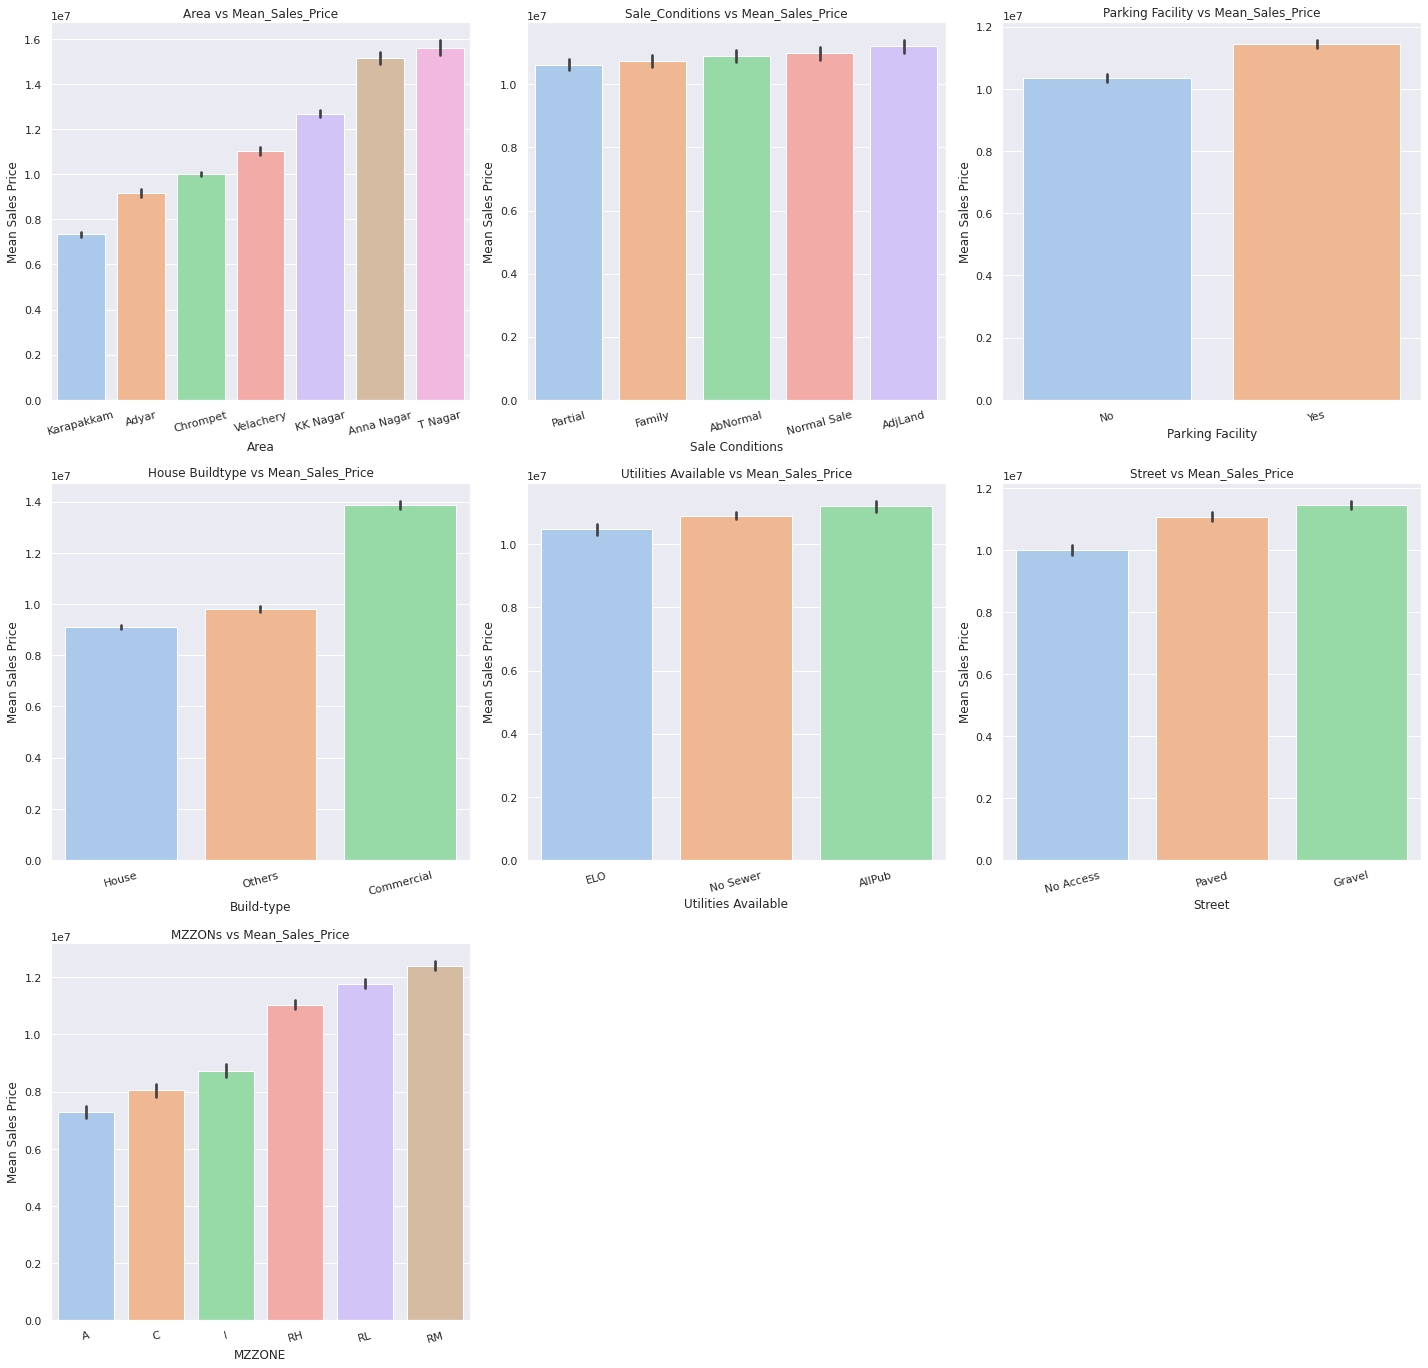

In [ ]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['area'],df['sales_price'],order=area_order)
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Mean Sales Price')
plt.title('Area vs Mean_Sales_Price')

plt.subplot(432)
sns.barplot(df['sale_cond'],df['sales_price'],order=sale_cond_order)
plt.xticks(rotation=15)
plt.xlabel('Sale Conditions')
plt.ylabel('Mean Sales Price')
plt.title('Sale_Conditions vs Mean_Sales_Price')

plt.subplot(433)
sns.barplot(df['park_facil'],df['sales_price'],order=park_facil_order)
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Mean Sales Price')
plt.title('Parking Facility vs Mean_Sales_Price')

plt.subplot(434)
sns.barplot(df['buildtype'],df['sales_price'],order=buildtype_order)
plt.xticks(rotation=15)
plt.xlabel('Build-type')
plt.ylabel('Mean Sales Price')
plt.title('House Buildtype vs Mean_Sales_Price')

plt.subplot(435)
sns.barplot(df['utility_avail'],df['sales_price'],order=utility_avail_order)
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Mean Sales Price')
plt.title('Utilities Available vs Mean_Sales_Price')

plt.subplot(436)
sns.barplot(df['street'],df['sales_price'],order=street_order)
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Mean Sales Price')
plt.title('Street vs Mean_Sales_Price')

plt.subplot(437)
sns.barplot(df['mzzone'],df['sales_price'],order=mzzone_order)
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Mean Sales Price')
plt.title('MZZONs vs Mean_Sales_Price')

plt.tight_layout()

<pre>Interpretations : 
From the above data visualization it can be understood that the categorical columns do have linear realtionship with the 
target variable ("sales_price" here). 
So we have to use Ordinal Encoding to Encode all these categorical columns.</pre>

    Plotting line plots for integer column vs Sales Price column.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

Text(0.5, 1.0, 'House Age vs Sales_Price')

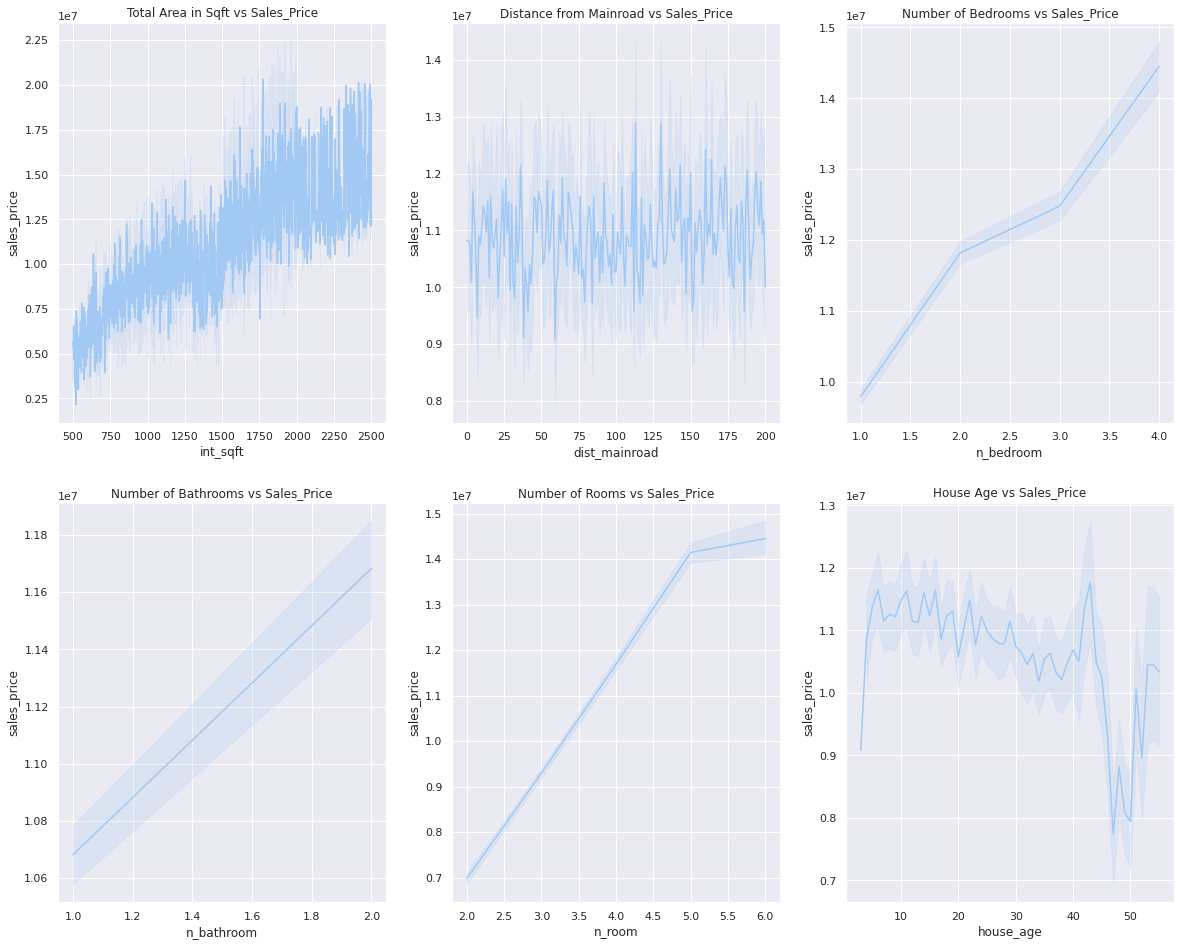

In [ ]:
plt.figure(figsize=(20,25))
plt.subplot(331)
sns.lineplot(df['int_sqft'],df['sales_price'])
plt.title('Total Area in Sqft vs Sales_Price')
plt.subplot(332)
sns.lineplot(df['dist_mainroad'],df['sales_price'])
plt.title('Distance from Mainroad vs Sales_Price')
plt.subplot(333)
sns.lineplot(df['n_bedroom'],df['sales_price'])
plt.title('Number of Bedrooms vs Sales_Price')
plt.subplot(334)
sns.lineplot(df['n_bathroom'],df['sales_price'])
plt.title('Number of Bathrooms vs Sales_Price')
plt.subplot(335)
sns.lineplot(df['n_room'],df['sales_price'])
plt.title('Number of Rooms vs Sales_Price')
plt.subplot(336)
sns.lineplot(df['house_age'],df['sales_price'])
plt.title('House Age vs Sales_Price')

<pre>Interpretations : 
 
For columns 'int_sqft','n_bedroom,'n_bathroom,'n_room' there is a clear Linear Relationship with the 'Sales_Price' column.

For column 'dist_mainroad' the distribution is uniform, no such linear relationship is discovered here.

For column 'house_age' we can see a hybrid kinda behaviour. For house ages 10 to 40 the sales_price drops a bit,
but from 40 to ~43 house prices rises and then again falls from ~43 - 50 and again it rises from 50-...

    Plotting scatter plots for masked data vs the sales_price column

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-pack

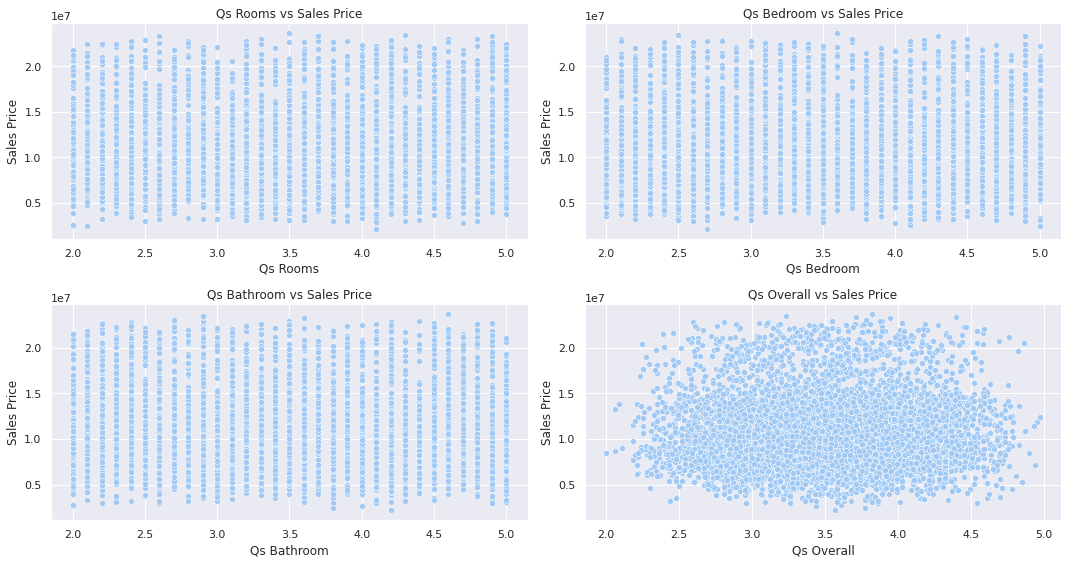

In [ ]:
plt.figure(figsize=(15,8))

plt.subplot(221)
sns.scatterplot(df['qs_rooms'],df['sales_price'])
plt.xlabel('Qs Rooms')
plt.ylabel('Sales Price')
plt.title('Qs Rooms vs Sales Price')

plt.subplot(222)
sns.scatterplot(df['qs_bedroom'],df['sales_price'])
plt.xlabel('Qs Bedroom')
plt.ylabel('Sales Price')
plt.title('Qs Bedroom vs Sales Price')

plt.subplot(223)
sns.scatterplot(df['qs_bathroom'],df['sales_price'])
plt.xlabel('Qs Bathroom')
plt.ylabel('Sales Price')
plt.title('Qs Bathroom vs Sales Price')

plt.subplot(224)
sns.scatterplot(df['qs_overall'],df['sales_price'])
plt.xlabel('Qs Overall')
plt.ylabel('Sales Price')
plt.title('Qs Overall vs Sales Price')

plt.tight_layout()

<pre>Interpretations : 
From the above scatterplots we can clearly observe that none of the plots exihibits Linear Relationship with the 
Target Variable i.e Sales_Price.

In [ ]:
del df['qs_rooms']
del df['qs_overall']
del df['qs_bathroom']
del df['qs_bedroom']
del df['dist_mainroad']
del df['sale_cond']

## Encoding Categorical Variables

In [ ]:
df['area'] = df['area'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
df['street'] = df['street'].map({'No Access':0,'Paved':1,'Gravel':2})
df['mzzone'] = df['mzzone'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
df['park_facil'] = df['park_facil'].map({'No':0,'Yes':1})
df = pd.get_dummies(df, columns = ['buildtype'])
df['utility_avail'] = df['utility_avail'].map({'ELO':0,'No Sewer':1,'AllPub':2})

In [ ]:
df.head()

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,utility_avail,street,mzzone,sales_price,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1


## Splitting the data into input data and output data

In [ ]:
#creating a function which will take the whole dataframe as input and return 2 dataframes, one containing input variables and the other
# holding the target variable

def split(dataframe):
  X = dataframe.drop('sales_price',axis=1)
  y = dataframe['sales_price']
  return X,y

In [ ]:
X, y = split(df)

In [ ]:
X

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,utility_avail,street,mzzone,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,2,1,0,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,11,1,0,0
2,1,909,1,1,3,1,0,2,5,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,0,0,0,6,49,0,0,1
7105,3,1897,3,2,5,1,1,0,4,9,0,0,1
7106,3,1614,2,1,4,0,1,2,2,28,0,1,0
7107,0,787,1,1,2,1,0,1,5,32,1,0,0


In [ ]:
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: sales_price, Length: 7109, dtype: int64

In [ ]:
#splitting the data into training and testing sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3378)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(5687, 13) (1422, 13) (5687,) (1422,)


##**12.Building Machine Learning Model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb


###**12.1 Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression #import
linear_model=LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train,y_train) #fit - all magic 
linear_model.predict(X_test)     #predict

array([ 7217936.83789586, 10216445.07783192,  7370395.01148501, ...,
       12021431.72552418,  6268912.46153474, 10841611.59444057])

In [ ]:
cross_val_linear_model=cross_val_score(linear_model,X_train,y_train,cv=10).mean()
cross_val_linear_model

0.9171109022964401

###**12.2 K Nearest Neighbor Regression** 

####**12.2.1 Choosing the best K(neighbor) Value**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_values=np.arange(1,50)
cross_val_knn=[]
for k in knn_values:
  knn_regressor=KNeighborsRegressor(n_neighbors=k)
  knn_regressor.fit(X_train_scaled,y_train)
  print("K value : ", k, " train score : ", knn_regressor.score(X_train_scaled,y_train)  ,"cross_val_score : ", cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())
  cross_val_knn.append(cross_val_score(knn_regressor,X_train_scaled,y_train,cv = 10).mean())

K value :  1  train score :  0.9999998522528323 cross_val_score :  0.9331953879641885
K value :  2  train score :  0.984375421571606 cross_val_score :  0.9472954817774853
K value :  3  train score :  0.9775281898618713 cross_val_score :  0.9507120216087408
K value :  4  train score :  0.9737113060400211 cross_val_score :  0.9509977204489714
K value :  5  train score :  0.9702691617207087 cross_val_score :  0.9507154223489737
K value :  6  train score :  0.9673173432841347 cross_val_score :  0.9504739377158404
K value :  7  train score :  0.9652905389329589 cross_val_score :  0.9501639641049037
K value :  8  train score :  0.9633945870330717 cross_val_score :  0.9495350737379014
K value :  9  train score :  0.962037734715506 cross_val_score :  0.948817350809378
K value :  10  train score :  0.9604841321454545 cross_val_score :  0.9477711650889666
K value :  11  train score :  0.9587474600099333 cross_val_score :  0.9468492458711795
K value :  12  train score :  0.9574675243990427 cross_

In [ ]:
cross_val_knn_regressor=max(cross_val_knn)

In [ ]:
print("The best K-Value is 4 and Cross_val_score is",cross_val_knn_regressor )

The best K-Value is 4 and Cross_val_score is 0.9509977204489714


####**12.2.2 Implementing K Nearest Neighbor Regression**

In [ ]:
knn_regressor=KNeighborsRegressor(n_neighbors=4)
knn_regressor.fit(X_train_scaled,y_train)


KNeighborsRegressor(n_neighbors=4)

In [ ]:
cross_val_knn_regressor=cross_val_score(knn_regressor,X_train_scaled,y_train,cv=15).mean()
cross_val_knn_regressor

0.9519476395859086

###**12.3 Decision Tree Regression**

####**12.3.1 Choosing the best of depth Value**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 15).mean())



Depth :  1  train Score  :  0.3583312881680608 cross_val_score :  0.35597241223773674
Depth :  2  train Score  :  0.6855771334725815 cross_val_score :  0.6840936024751566
Depth :  3  train Score  :  0.8012272213477751 cross_val_score :  0.7996968370789223
Depth :  4  train Score  :  0.8862960034458813 cross_val_score :  0.8807371777796434
Depth :  5  train Score  :  0.9221911081453347 cross_val_score :  0.9157278258968541
Depth :  6  train Score  :  0.9437591060952913 cross_val_score :  0.9358103237462359
Depth :  7  train Score  :  0.9591954060557865 cross_val_score :  0.948257141563897
Depth :  8  train Score  :  0.9725021251431463 cross_val_score :  0.9602239099108658
Depth :  9  train Score  :  0.9823069076522002 cross_val_score :  0.9672096422788347
Depth :  10  train Score  :  0.9895914568770962 cross_val_score :  0.9713696524838691
Depth :  11  train Score  :  0.9939644708643373 cross_val_score :  0.9730516949284091
Depth :  12  train Score  :  0.9967867466670757 cross_val_score

In [ ]:
cross_val_dt_regressor=max(cross_val_dt)

In [ ]:
print("The best depth is 18 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 18 and Cross_val_score is: 0.9744485463482118


####**12.3.2 Implementing Decision Tree Regression**

In [ ]:
dt_regressor=DecisionTreeRegressor(max_depth=18, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=18, random_state=0)

In [ ]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=15).mean()
cross_val_dt_regressor

0.9744485463482118

In [ ]:
ftImp = list(zip(dt_regressor.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
0,0.474588,area
10,0.327248,house_age
1,0.118911,int_sqft
8,0.038219,mzzone
5,0.015458,park_facil
7,0.012270,street
9,0.005765,sales_price
11,0.004358,buildtype_Commercial
6,0.001307,utility_avail
12,0.000975,buildtype_House


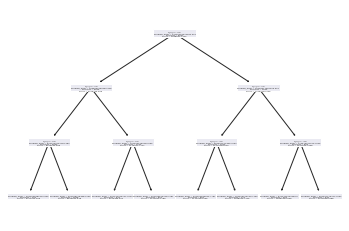

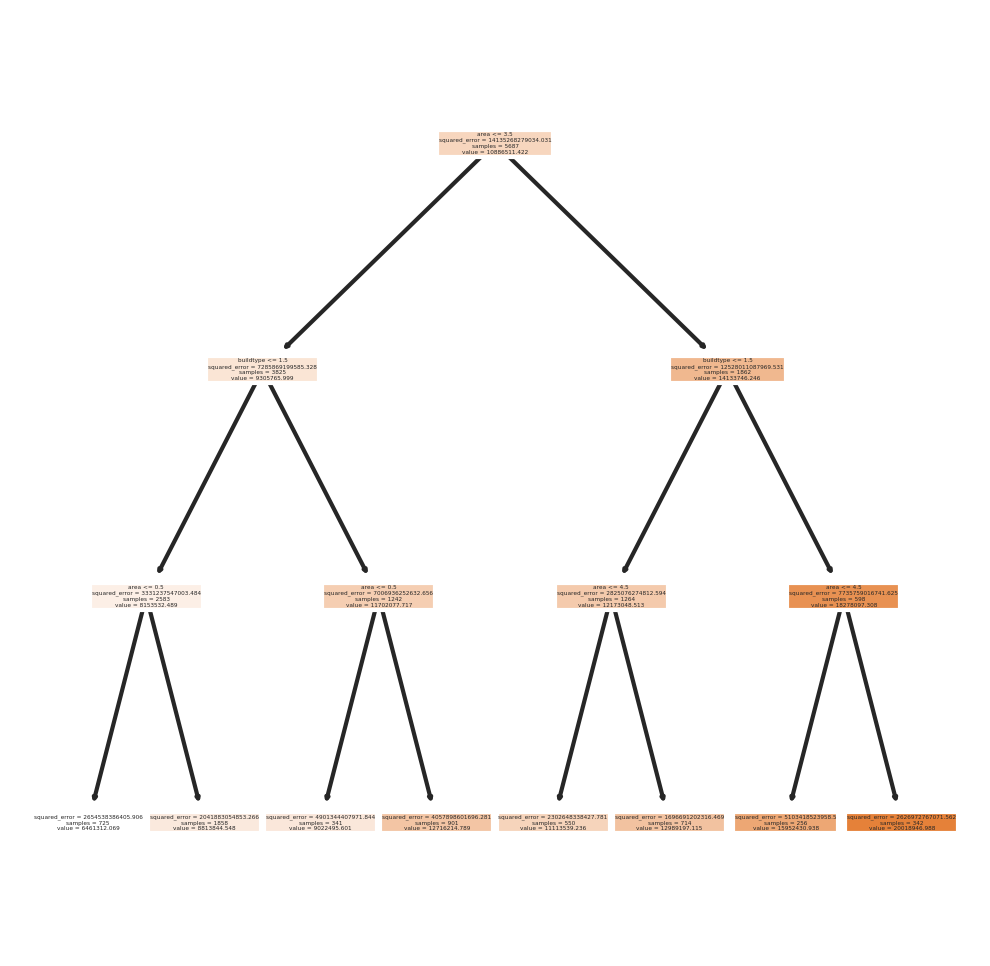

In [ ]:
from sklearn import tree
tree.plot_tree(dt_regressor) 

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_regressor,
               feature_names = new_df.columns[:-1],
               filled = True);
fig.savefig('imagename.png')

###**12.4 Random Forest Regression**

####**12.4.1 Choosing the best depth value**

In [ ]:
max_depth=np.array([2,4,8,10,11,12,13,15,18,20])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 15).mean())

Depth :  2 cross_val_score :  0.684097146133375
Depth :  4 cross_val_score :  0.8922779761759058
Depth :  8 cross_val_score :  0.9753040433616239
Depth :  10 cross_val_score :  0.9849687612228888
Depth :  11 cross_val_score :  0.9868242330278144
Depth :  12 cross_val_score :  0.9876706999898209
Depth :  13 cross_val_score :  0.988022845414287
Depth :  15 cross_val_score :  0.988244484174261
Depth :  18 cross_val_score :  0.9882577599329966
Depth :  20 cross_val_score :  0.988248437227311


In [ ]:
cross_val_rf_regressor=max(cross_val_rf)

In [ ]:
print("The best depth is 20 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 20 and Cross_val_score is: 0.9882577599329966


####**12.4.2 Implementing Random Forest Regression**

In [ ]:
rf_regressor=RandomForestRegressor(max_depth=20, random_state=0)
rf_regressor.fit(X_train,y_train)


RandomForestRegressor(max_depth=20, random_state=0)

In [ ]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=15).mean()
cross_val_rf_regressor

0.988248437227311

###**12.6 Extreme Gradient Boosting Regression**

####**12.6.1 Choosing the best Learning Rate** 

In [ ]:
cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.09,0.1,0.11,0.12,0.13,0.15,0.18,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(colsample_bytree=0.4,learning_rate = lr,n_estimators=1000) 
  xgb_regressor.fit(X_train,y_train) 
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.993957278430719
Learning rate :  0.05 cross_val_score: 0.9953580097037613
Learning rate :  0.08 cross_val_score: 0.9951454162338772
Learning rate :  0.09 cross_val_score: 0.9950982148536153
Learning rate :  0.1 cross_val_score: 0.9951218829234288
Learning rate :  0.11 cross_val_score: 0.9950903102745343
Learning rate :  0.12 cross_val_score: 0.995000035037696
Learning rate :  0.13 cross_val_score: 0.9949669570643088
Learning rate :  0.15 cross_val_score: 0.9948351845837283
Learning rate :  0.18 cross_val_score: 0.9946975349197176
Learning rate :  0.2 cross_val_score: 0.9946304739709556
Learning rate :  0.25 cross_val_score: 0.9943779049149929
Learning rate :  0.3 cross_val_score: 0.9941810132019736


In [ ]:
cross_val_xgb_regressor=max(cross_val_xgb)

In [ ]:
print("The best Learning rate is 0.09 and Cross_val_score is:",cross_val_xgb_regressor)


The best Learning rate is 0.09 and Cross_val_score is: 0.9903788729633959


####**12.6.2 Implementing Extreme Gradient Boosting Regression**

In [ ]:
  xgb_regressor= xgb.XGBRegressor(learning_rate =0.09,n_estimators=100) # initialise the model
  xgb_regressor.fit(X_train,y_train) #train the model


[11:05:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.09)

In [ ]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

[11:05:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:05:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

0.9884186474440287

###**12.7 Cross-Validation Score for Machine-Learning Models**

In [ ]:
print("Cross Validation Score for Linear Regression Model:",cross_val_linear_model)
print("Cross Validation Score for K-Nearest Neighbors Regression Model:",cross_val_knn_regressor)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: 0.9084438307995484
Cross Validation Score for K-Nearest Neighbors Regression Model: 0.44055014833567246
Cross Validation Score for Decision Tree Regression Model:  0.973942863704896
Cross Validation Score for Random Forest Regression Model:  0.9894594617304743
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9884186474440287


###**12.8 R2 Score for Machine-Learning Models**

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred_lr=linear_model.predict(X_test)
y_pred_knn=knn_regressor.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [ ]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_knn=r2_score(y_test,y_pred_knn)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [ ]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for K-Nearest Neighbors Regression Model:",R2_score_knn)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.9034829017091307
R2 Score for K-Nearest Neighbors Regression Model: 0.4279009381399531
R2 Score for Decision Tree Regression Model:  0.9734800666233124
R2 Score for Random Forest Regression Model:  0.990450493106276
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9886844846390079


##**13. Suggestion to Sellers and buyers**-Solving problem statements based on Feature Importance

In [ ]:
rf_regressor.feature_importances_

In [ ]:
df.columns

In [ ]:
sorted_idx = rf_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], rf_regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()

In [ ]:
xgb_regressor.feature_importances_

In [ ]:

sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("Extreme Gradient Boosting Feature Importance")
plt.title("Feature Importance")
plt.show()

**Suggestion to Sellers**

Based on the **feature importance** given by Best Machine Learning
Algorithm(**Extreme Gradient Boosting**)-Sellers should Focus on the features of order given below to build homes that fetch more money:



1.   Age of the building,
2.   Area(location) of the building,
3.   No. of Rooms present,
4.   Build_type(Commercial,House etc..)-Commercial is best,
5.   MZ Zone,
6.   Parking Facility,
7.   No. of Bedrooms,
8.   Area(SQFT) of the building, 
9.   No. of Bathrooms,
10.  Street(Paved, Gravel, No access, etc.) of the building,
11.  Sales Condition,
12.  Utility available.